In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
plt.style.use('fivethirtyeight')
import re


In [2]:
box_df = pd.read_csv('data/nba_box_2020.csv')

To find the stats you want to use in your model you need to find correlations

In [3]:
box_df['Player'] = box_df['Player'].str.split('[^A-Za-z0-9 ]+').str[1]
box_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,Nickeil Alexander,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020


# Same but for advanced

In [4]:
advanced_df = pd.read_csv('data/nba_advanced_2020.csv')
advanced_df['Player'] = advanced_df['Player'].str.split('[^A-Za-z0-9 ]+').str[1]

In [5]:
advanced_df.head()

,Player,Pos,Age,Tm,G,Per,TS%,3PAr,TFr,ORB%,...,TOV%,USG%,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,Season
0,Steven Adams,C,26,OKC,63,20.5,0.604,0.006,0.421,14.0,...,14.2,17.3,3.8,2.7,6.5,1.9,1.1,2.9,2.1,2020
1,Bam Adebayo,PF,22,MIA,72,20.3,0.598,0.018,0.484,8.5,...,17.6,21.2,4.6,3.9,8.5,1.4,2.0,3.4,3.3,2020
2,LaMarcus Aldridge,C,34,SAS,53,19.7,0.571,0.198,0.241,6.3,...,7.8,23.4,3.0,1.4,4.5,1.8,-0.5,1.4,1.5,2020
3,Kyle Alexander,C,23,MIA,2,4.7,0.500,0.000,0.000,17.9,...,33.3,10.2,0.0,0.0,0.0,-6.1,-3.5,-9.6,0.0,2020
4,Nickeil Alexander,SG,21,NOP,47,8.9,0.473,0.500,0.139,1.6,...,16.1,23.3,-0.7,0.4,-0.2,-3.2,-1.4,-4.6,-0.4,2020


# Merge box_df and advanced_df

In [6]:
box_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

In [7]:
advanced_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'Per', 'TS%', '3PAr', 'TFr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Season'],
      dtype='object')

In [8]:
advanced_df.shape

(529, 25)

In [9]:
a_df = box_df.copy()

In [10]:
merged_df = a_df.merge(advanced_df, how='outer', on =['Player', 'Tm', 'Pos', 'Age', 'G', 'Season'])
merged_df.fillna(0, inplace=True)

In [11]:
merged_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season', 'Per',
       'TS%', '3PAr', 'TFr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

# PCA

In [12]:
# remove names, teams and other discrete data
pd.set_option('display.max_columns', 500)

cleaned_merged_df = merged_df.drop(columns = {'Player', 'Tm', 'Pos', 'Age', 'Season'})
cleaned_merged_df.corr().describe()
# TOV, 3PAr have a negative mean correlation
# STL, TOV, ORB have almost zero correlation

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per,TS%,3PAr,TFr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.361130,0.418525,0.478010,0.512710,0.475922,0.289668,0.301438,0.292177,0.169871,0.495362,0.478723,0.223803,0.300052,0.462402,0.473165,0.216097,0.338508,0.475936,0.461437,0.385474,0.373459,0.326757,0.456842,0.397570,0.508691,0.460956,0.334765,-0.122565,0.146793,0.056218,0.172530,0.145951,0.230245,0.023834,0.139743,-0.038690,0.290093,0.450981,0.445835,0.490444,0.459533,0.177002,0.447343,0.453362
std,0.237496,0.277463,0.319476,0.334443,0.350900,0.289968,0.338688,0.346498,0.235075,0.313177,0.322917,0.253628,0.261921,0.313772,0.308157,0.208319,0.292789,0.270428,0.277705,0.312643,0.258492,0.247528,0.309498,0.228317,0.341157,0.251604,0.254873,0.300266,0.205923,0.297441,0.272384,0.315324,0.258485,0.201219,0.267926,0.196243,0.286256,0.266549,0.249570,0.276130,0.265525,0.220222,0.238011,0.264467
min,-0.135544,-0.087791,-0.151036,-0.146822,-0.166558,-0.523726,-0.379023,-0.399443,-0.290977,-0.381431,-0.329315,-0.278616,-0.200251,-0.133466,-0.194342,-0.222281,-0.546393,-0.244830,-0.348553,-0.212464,-0.175154,-0.327874,-0.124505,-0.144629,-0.150590,-0.381679,-0.196229,-0.547322,-0.429307,-0.543879,-0.418292,-0.547322,-0.225010,-0.187572,-0.377759,-0.317212,-0.300951,-0.153394,-0.093641,-0.143472,-0.317212,-0.300951,-0.235349,-0.113263
25%,0.210926,0.207334,0.270967,0.285794,0.171743,0.126554,-0.012748,-0.011774,0.064715,0.253365,0.202159,0.076401,0.157838,0.165189,0.205182,0.118487,0.212292,0.292302,0.295015,0.084787,0.200411,0.257363,0.188398,0.242759,0.261746,0.352463,0.199461,-0.328234,0.064052,-0.134418,0.027644,-0.012243,0.057948,-0.046236,-0.039561,-0.138364,0.069068,0.271055,0.237998,0.277023,0.363037,0.052914,0.352787,0.250134
50%,0.407912,0.492522,0.568143,0.632849,0.582392,0.275467,0.384422,0.366615,0.188869,0.582061,0.553524,0.194834,0.283584,0.534804,0.515119,0.247404,0.363795,0.529542,0.533022,0.454907,0.450347,0.341818,0.544920,0.391592,0.622913,0.476160,0.325643,-0.128985,0.155792,0.038609,0.143208,0.130730,0.223411,-0.026098,0.122138,-0.052802,0.263567,0.442694,0.491884,0.522182,0.502678,0.131757,0.474667,0.446701
75%,0.482517,0.627093,0.718253,0.728773,0.746009,0.386211,0.514559,0.505335,0.320666,0.723599,0.689907,0.297287,0.360374,0.713485,0.713409,0.334917,0.512961,0.665617,0.644698,0.635634,0.547471,0.415369,0.644248,0.561159,0.729080,0.620806,0.392360,-0.035490,0.216752,0.198161,0.243481,0.222589,0.416404,0.033321,0.311394,0.025458,0.485267,0.623953,0.626125,0.702603,0.634353,0.294311,0.576759,0.638283
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#normalize
norm_df = ((cleaned_merged_df - cleaned_merged_df.min())/(cleaned_merged_df.max() - cleaned_merged_df.min()))
norm_df.describe()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per,TS%,3PAr,TFr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.566176,0.274232,0.507207,0.293803,0.307741,0.445060,0.213997,0.217650,0.296422,0.235684,0.232635,0.506389,0.507130,0.136217,0.153680,0.708340,0.190368,0.245349,0.238994,0.188591,0.296156,0.137605,0.234247,0.350775,0.254416,0.569446,0.596310,0.380403,0.169061,0.061587,0.206074,0.188959,0.134087,0.094273,0.160548,0.181763,0.429317,0.218877,0.211572,0.231727,0.508971,0.655779,0.592212,0.242764
std,0.310046,0.332035,0.252335,0.208528,0.207786,0.109519,0.194752,0.178680,0.144967,0.190736,0.180557,0.123546,0.107792,0.137782,0.146552,0.211762,0.170041,0.164466,0.163222,0.172798,0.191808,0.142025,0.171114,0.163937,0.185655,0.130872,0.112594,0.208011,0.108329,0.064353,0.098374,0.099771,0.095392,0.064547,0.157024,0.086494,0.132240,0.126089,0.182542,0.160092,0.119812,0.057203,0.103549,0.119032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287671,0.000000,0.301370,0.128440,0.148472,0.401000,0.068182,0.072581,0.250000,0.093750,0.101604,0.462000,0.476000,0.049020,0.059322,0.648000,0.068182,0.131579,0.125000,0.078431,0.142857,0.034483,0.125000,0.240000,0.113703,0.494670,0.558758,0.256000,0.104000,0.025958,0.143240,0.120594,0.072000,0.061728,0.052632,0.138655,0.342593,0.134921,0.058824,0.104167,0.448399,0.628743,0.550369,0.177778
50%,0.643836,0.082192,0.490411,0.247706,0.253275,0.440000,0.181818,0.185484,0.333000,0.177083,0.176471,0.510000,0.518000,0.098039,0.110169,0.759000,0.136364,0.210526,0.210526,0.137255,0.285714,0.103448,0.187500,0.360000,0.204082,0.562900,0.610865,0.397000,0.151333,0.042027,0.190094,0.168831,0.105000,0.086420,0.122807,0.175070,0.407407,0.174603,0.156863,0.180556,0.516014,0.652695,0.599509,0.200000
75%,0.835616,0.534247,0.734247,0.403670,0.423581,0.488000,0.318182,0.306452,0.376000,0.312500,0.315508,0.567000,0.557000,0.166667,0.194915,0.833000,0.250000,0.324561,0.309211,0.235294,0.428571,0.172414,0.291667,0.460000,0.346939,0.641791,0.654102,0.514000,0.219333,0.081582,0.255689,0.233766,0.178000,0.117284,0.210526,0.211485,0.502315,0.277778,0.313725,0.326389,0.576512,0.685629,0.648649,0.277778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# There are a number of correlated features that need to be accounted for
# perform PCA

from sklearn.decomposition import PCA

pca_list = []

for n_components in range(2, 11):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(norm_df)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.6360034360022842
For n_components = 3, explained variance ratio is 0.7085807864340612
For n_components = 4, explained variance ratio is 0.7589965784350791
For n_components = 5, explained variance ratio is 0.7908592174964059
For n_components = 6, explained variance ratio is 0.8206895441284399
For n_components = 7, explained variance ratio is 0.8457054391198144
For n_components = 8, explained variance ratio is 0.8687227489652783
For n_components = 9, explained variance ratio is 0.8904600121712546
For n_components = 10, explained variance ratio is 0.906396022638846


Text(0.5, 1.0, 'Explained Variance vs PCA Components')

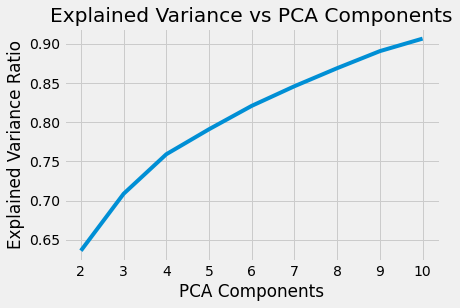

In [15]:
pca_comp, ax = plt.subplots()
ax.plot(range(2,11), pca_list)
ax.set_xlabel('PCA Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xticks(np.arange(2, 11, 1.0))
ax.set_title('Explained Variance vs PCA Components')

Text(0, 0.5, 'Explained Variance Difference')

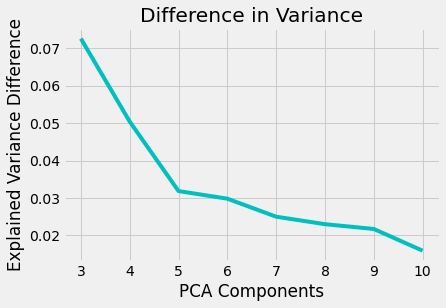

In [16]:
from numpy import diff

y = diff(pca_list)
pca_variance_diff, ax = plt.subplots()

ax.plot(range(3,11), y, 'c')
ax.set_title("Difference in Variance")
ax.set_xlabel('PCA Components')
ax.set_ylabel('Explained Variance Difference')

In [17]:


pca = PCA(n_components = 7)
components = pca.fit_transform(norm_df)
components_df = pd.DataFrame(components, columns = {'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'})
components_df['Player'] = merged_df.Player
components_df[['Player','PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']].head()

,Player,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,Steven Adams,0.185137,0.895736,0.095392,0.896166,0.289199,-0.211760,0.125651
1,Bam Adebayo,0.139754,0.840702,0.282390,1.522335,0.361307,-0.010820,-0.084988
2,LaMarcus Aldridge,-0.127744,0.372703,-0.202747,1.134862,0.020608,0.138059,0.136041
3,Kyle Alexander,0.347858,0.403977,0.066674,-1.185272,0.340997,0.368104,0.218694
4,Nickeil Alexander,-0.002136,-0.294760,0.068507,-0.460812,-0.033184,0.006225,-0.127578


In [18]:
pca.explained_variance_ratio_

array([0.51153895, 0.12446448, 0.07257735, 0.05041579, 0.03186356,
       0.02982935, 0.02501579])

# Kmeans Cluster Analysis

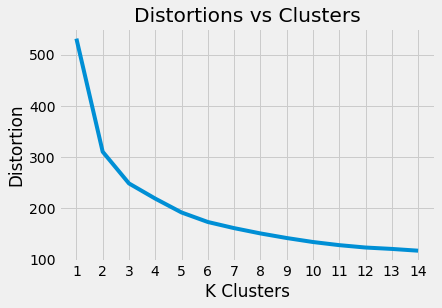

In [19]:
# Find k clusters
# elbow method
from sklearn.cluster import KMeans

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(components_df.drop(columns = {'Player'}))
    distortions.append(kmeanModel.inertia_)
    
elbow_fig, ax = plt.subplots()
ax.set_xlabel('K Clusters')
ax.set_ylabel('Distortion')
ax.set_xticks(np.arange(1,15,1))
ax.set_title('Distortions vs Clusters')
ax.plot(range(1,15), distortions)


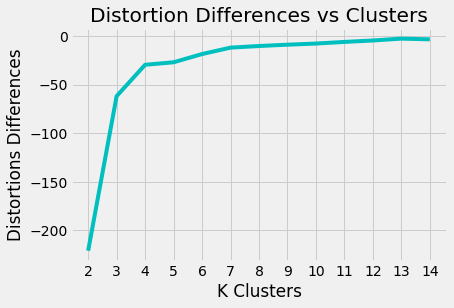

In [20]:
distortion_dff = diff(distortions)

elbow_diff_fig, ax = plt.subplots()
ax.set_xlabel('K Clusters')
ax.set_ylabel('Distortions Differences')
ax.set_title('Distortion Differences vs Clusters')
ax.set_xticks(np.arange(2,15,1))
ax.plot(range(2,15), distortion_dff, 'c')

In [22]:
np_array = np.column_stack((components_df['PC1'],components_df['PC2'],components_df['PC3'],components_df['PC4'],
                            components_df['PC5'], components_df['PC6'], components_df['PC7']))

In [40]:
from sklearn.metrics import silhouette_score

silhouette_list = []
np_array = np.column_stack((components_df['PC1'],components_df['PC2'],components_df['PC3'],components_df['PC4'],
                            components_df['PC5'], components_df['PC6'], components_df['PC7']))
for k in range(2,15):
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeanModel.fit_predict(np_array)
    silhouette_avg = silhouette_score(np_array, cluster_labels)
    silhouette_list.append(silhouette_avg)
    print("For n_clusters ={}, average silhouette score is {}" .format(k, silhouette_avg))
    


For n_clusters =2, average silhouette score is 0.3672478839748538
For n_clusters =3, average silhouette score is 0.25331591531106584
For n_clusters =4, average silhouette score is 0.26223013086585256
For n_clusters =5, average silhouette score is 0.21978773426381185
For n_clusters =6, average silhouette score is 0.22536653925728595
For n_clusters =7, average silhouette score is 0.2069131299763669
For n_clusters =8, average silhouette score is 0.20475566930963515
For n_clusters =9, average silhouette score is 0.19684865247248165
For n_clusters =10, average silhouette score is 0.19481454009417445
For n_clusters =11, average silhouette score is 0.18022059267167592
For n_clusters =12, average silhouette score is 0.19402700042902724
For n_clusters =13, average silhouette score is 0.17207931920735173
For n_clusters =14, average silhouette score is 0.17519700885145287


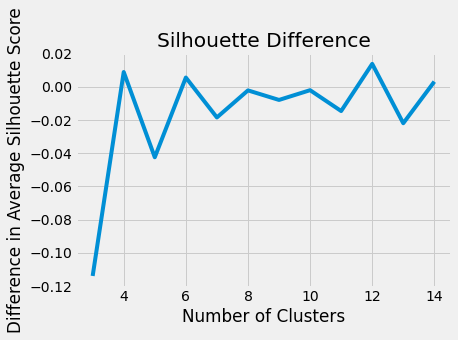

In [44]:
sil_diff, ax2 = plt.subplots()
ax2.set_title('Silhouette Difference')
ax2.set_ylabel("Difference in Average Silhouette Score")
ax2.set_xlabel("Number of Clusters")
ax2.plot(range(3,15), diff(silhouette_list))

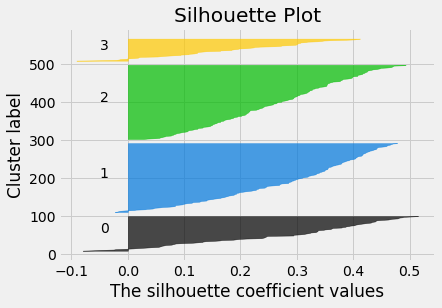

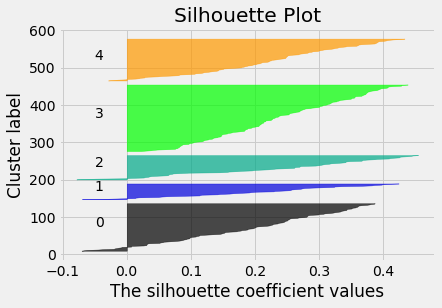

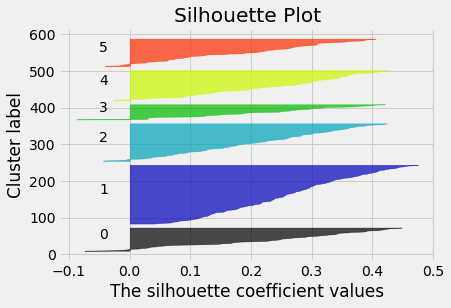

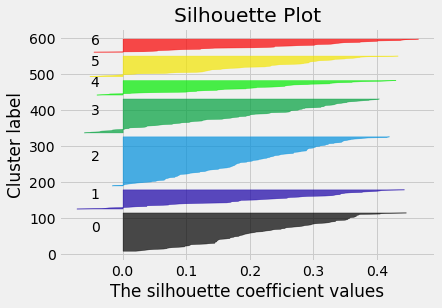

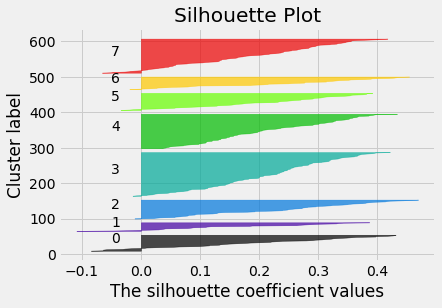

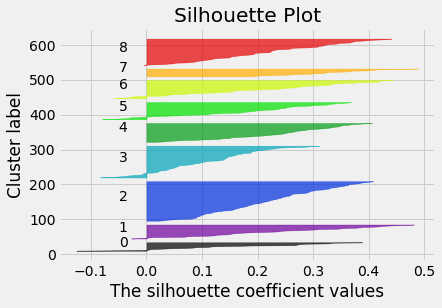

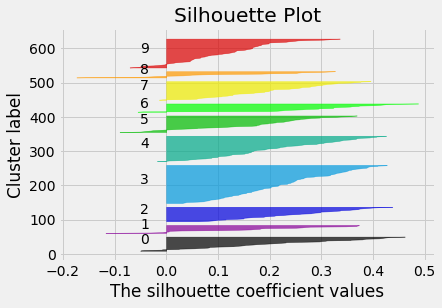

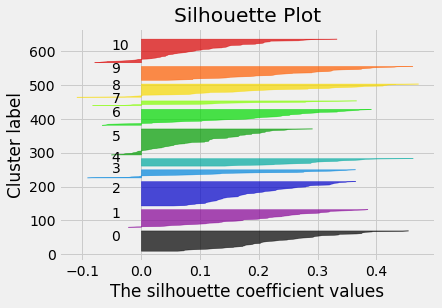

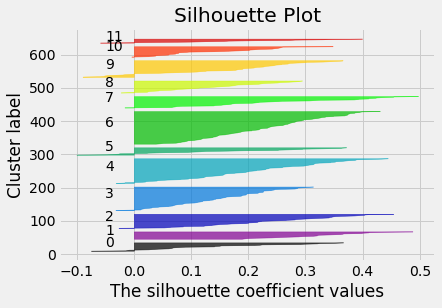

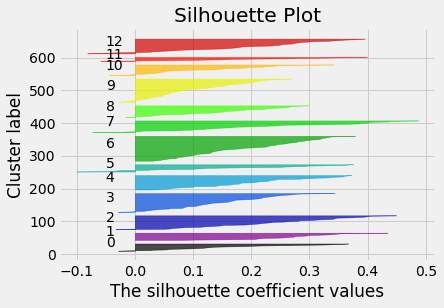

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score


for k in range(4,14):
    fig, ax1 = plt.subplots()
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeanModel.fit_predict(np_array)
    silhouette_avg = silhouette_score(np_array, cluster_labels)
    silhouette_list.append(silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(np_array, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.set_title('Silhouette Plot')
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

K = 4

In [22]:
# lets try 4 first
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=4, random_state=0).fit(components_df.drop(columns = {'Player'}))

cluster_df = pd.DataFrame(merged_df.Player, columns = {'Player'})
cluster_df['Cluster'] = km_model.predict(components_df.drop(columns = {'Player'}))
cluster_df.shape

(529, 2)

In [23]:
# return columns with player names belonging in each cluster

In [24]:
group1 = cluster_df[cluster_df['Cluster'] ==0]
group2 = cluster_df[cluster_df['Cluster'] ==1]
group3 = cluster_df[cluster_df['Cluster'] ==2]
group4 = cluster_df[cluster_df['Cluster'] ==3]

In [25]:
(group1.shape, group2.shape, group3.shape, group4.shape)

((74, 2), (142, 2), (182, 2), (131, 2))

In [26]:
group1.head(20)

,Player,Cluster
1,Bam Adebayo,0
2,LaMarcus Aldridge,0
12,Giannis Antetokounmpo,0
20,Deandre Ayton,0
34,Bradley Beal,0
46,Eric Bledsoe,0
48,Bojan Bogdanovi,0
54,Devin Booker,0
67,Malcolm Brogdon,0
71,Jaylen Brown,0


In [27]:
group2.head(20)

,Player,Cluster
3,Kyle Alexander,1
7,Kadeem Allen,1
9,Justin Anderson,1
11,Ryan Anderson,1
13,Kostas Antetokounmpo,1
14,Thanasis Antetokounmpo,1
37,Jordan Bell,1
49,Bol Bol,1
50,Jonah Bolden,1
51,Marques Bolden,1


In [28]:
group3.head(20)

,Player,Cluster
4,Nickeil Alexander,2
5,Grayson Allen,2
8,Al,2
17,Ryan Arcidiacono,2
19,D,2
21,Dwayne Bacon,2
24,Mo Bamba,2
25,J,2
29,Keita Bates,2
30,Nicolas Batum,2


In [29]:
group4.head(20)

,Player,Cluster
0,Steven Adams,3
6,Jarrett Allen,3
10,Kyle Anderson,3
15,Carmelo Anthony,3
16,OG Anunoby,3
18,Trevor Ariza,3
22,Marvin Bagley III,3
23,Lonzo Ball,3
26,Harrison Barnes,3
27,RJ Barrett,3


k = 4 did not give any conclusive results

Going back to the Elbow diff graph, try 12

In [63]:
k = 12
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=12, random_state=0).fit(components_df.drop(columns = {'Player'}))

cluster_df = pd.DataFrame(merged_df.Player, columns = {'Player'})
cluster_df['Cluster'] = km_model.predict(components_df.drop(columns = {'Player'}))
cluster_df.shape

(529, 2)

In [64]:
group1 = cluster_df[cluster_df['Cluster'] ==0]
group2 = cluster_df[cluster_df['Cluster'] ==1]
group3 = cluster_df[cluster_df['Cluster'] ==2]
group4 = cluster_df[cluster_df['Cluster'] ==3]
group5 = cluster_df[cluster_df['Cluster'] ==4]
group6 = cluster_df[cluster_df['Cluster'] ==5]
group7 = cluster_df[cluster_df['Cluster'] ==6]
group8 = cluster_df[cluster_df['Cluster'] ==7]
group9 = cluster_df[cluster_df['Cluster'] ==8]
group10 = cluster_df[cluster_df['Cluster'] ==9]
group11 = cluster_df[cluster_df['Cluster'] ==10]
group12 = cluster_df[cluster_df['Cluster'] ==11]

In [65]:
(group1.shape, group2.shape, group3.shape, group4.shape, group5.shape, group6.shape, group7.shape, group8.shape,
group9.shape, group10.shape, group11.shape, group12.shape)

((26, 2),
 (23, 2),
 (43, 2),
 (72, 2),
 (75, 2),
 (23, 2),
 (99, 2),
 (35, 2),
 (37, 2),
 (51, 2),
 (32, 2),
 (13, 2))

In [66]:
group1

,Player,Cluster
22,Marvin Bagley III,0
31,Aron Baynes,0
39,Dragan Bender,0
108,Zach Collins,0
120,Stephen Curry,0
178,Eric Gordon,0
189,Blake Griffin,0
226,Rodney Hood,0
234,Chandler Hutchison,0
245,Josh Jackson,0


In [67]:
group2

,Player,Cluster
3,Kyle Alexander,1
11,Ryan Anderson,1
51,Marques Bolden,1
52,Jordan Bone,1
56,Brian Bowen,1
143,Henry Ellenson,1
183,Josh Gray,1
191,Kyle Guy,1
199,Jared Harper,1
215,Kevin Hervey,1


In [68]:
group3

,Player,Cluster
46,Eric Bledsoe,2
48,Bojan Bogdanovi,2
67,Malcolm Brogdon,2
71,Jaylen Brown,2
81,Jimmy Butler,2
127,DeMar DeRozan,2
131,Spencer Dinwiddie,2
158,Evan Fournier,2
159,De,2
166,Danilo Gallinari,2


In [69]:
group4

,Player,Cluster
10,Kyle Anderson,3
18,Trevor Ariza,3
19,D,3
32,Kent Bazemore,3
35,Malik Beasley,3
...,...,...
498,Brad Wanamaker,3
506,Coby White,3
507,Derrick White,3
521,Delon Wright,3


In [70]:
group5

,Player,Cluster
7,Kadeem Allen,4
9,Justin Anderson,4
50,Jonah Bolden,4
60,Jarrell Brantley,4
61,Ignas Brazdeikis,4
...,...,...
503,Paul Watson,4
504,Quinndary Weatherspoon,4
516,Nigel Williams,4
518,D,4


In [71]:
group6

,Player,Cluster
0,Steven Adams,5
1,Bam Adebayo,5
2,LaMarcus Aldridge,5
6,Jarrett Allen,5
20,Deandre Ayton,5
86,Clint Capela,5
90,Wendell Carter Jr,5
107,John Collins,5
139,Andre Drummond,5
145,Joel Embiid,5


In [72]:
group7

,Player,Cluster
4,Nickeil Alexander,6
5,Grayson Allen,6
8,Al,6
17,Ryan Arcidiacono,6
21,Dwayne Bacon,6
...,...,...
485,Denzel Valentine,6
495,Lonnie Walker,6
510,Grant Williams,6
512,Kenrich Williams,6


In [73]:
group8

,Player,Cluster
24,Mo Bamba,7
42,Khem Birch,7
44,Bismack Biyombo,7
55,Chris Boucher,7
59,Tony Bradley,7
76,Thomas Bryant,7
93,Willie Cauley,7
99,Marquese Chriss,7
101,Brandon Clarke,7
151,Derrick Favors,7


In [74]:
group9

,Player,Cluster
15,Carmelo Anthony,8
16,OG Anunoby,8
23,Lonzo Ball,8
26,Harrison Barnes,8
27,RJ Barrett,8
28,Will Barton,8
45,Nemanja Bjelica,8
64,Miles Bridges,8
68,Dillon Brooks,8
69,Bruce Brown,8


In [75]:
group10

,Player,Cluster
13,Kostas Antetokounmpo,9
14,Thanasis Antetokounmpo,9
37,Jordan Bell,9
43,Goga Bitadze,9
49,Bol Bol,9
72,Moses Brown,9
82,Bruno Caboclo,9
83,Devontae Cacok,9
94,Tyson Chandler,9
97,Zylan Cheatham,9


In [76]:
group11

,Player,Cluster
40,D,10
41,Patrick Beverley,10
47,Bogdan Bogdanovi,10
58,Avery Bradley,10
109,Mike Conley,10
117,Jae Crowder,10
119,Seth Curry,10
157,Bryn Forbes,10
168,Darius Garland,10
184,Danny Green,10


In [78]:
group12.shape

(13, 2)

In [45]:
for_names = pd.read_csv('data/nba_box_2020.csv')
for_names.iloc[337]

Player    b'C.J. Miles'
Pos                  SF
Age                  32
Tm                  WAS
G                    10
GS                    0
MP                 16.1
FG                  1.9
FGA                 5.9
FG%               0.322
3P                  1.1
3PA                 3.5
3P%               0.314
2P                  0.8
2PA                 2.4
2P%               0.333
eFG%              0.415
FT                  1.5
FTA                   2
FT%                0.75
ORB                 0.4
DRB                 0.8
TRB                 1.2
AST                 1.2
STL                   1
BLK                 0.4
TOV                 0.4
PF                  1.4
PTS                 6.4
Season             2020
Name: 337, dtype: object

# Problems with Kmeans

Due to kmeans clustering being so dependant on initial starting point, reruning the model with the same data will result in different groups being formed. Also since K is non trival and is not found by kmeans, there is always a level of ambiguity in the number of clusters. In this particular case, k = 4 gives more of a tier list of players while k = 12 gives more distinct player styles.

# Mean Shift Clustering


In [83]:
from sklearn.cluster import MeanShift

ms_model = MeanShift(bandwidth=.7).fit(components_df.drop(columns = {'Player'}))
mean_shift_df = pd.DataFrame(merged_df.Player, columns = {'Player'})

mean_shift_df['Cluster'] = ms_model.predict(components_df.drop(columns={'Player'}))
mean_shift_df.shape

(529, 2)

In [84]:
mean_shift_df.Cluster.unique()

array([7, 5, 0, 1, 9, 8, 3, 4, 2, 6], dtype=int64)

In [54]:
ms1 = mean_shift_df[mean_shift_df['Cluster'] == 0]
ms2 = mean_shift_df[mean_shift_df['Cluster'] == 1]
ms3 = mean_shift_df[mean_shift_df['Cluster'] == 2]
ms4 = mean_shift_df[mean_shift_df['Cluster'] == 3]
ms5 = mean_shift_df[mean_shift_df['Cluster'] == 4]
ms6 = mean_shift_df[mean_shift_df['Cluster'] == 5]
ms7 = mean_shift_df[mean_shift_df['Cluster'] == 6]
ms8 = mean_shift_df[mean_shift_df['Cluster'] == 7]
ms9 = mean_shift_df[mean_shift_df['Cluster'] == 8]

In [55]:
ms1

,Player,Cluster
4,Nickeil Alexander,0
5,Grayson Allen,0
7,Kadeem Allen,0
8,Al,0
9,Justin Anderson,0
...,...,...
518,D,0
521,Delon Wright,0
522,Justin Wright,0
523,Thaddeus Young,0


In [56]:
ms2

,Player,Cluster
12,Giannis Antetokounmpo,1
34,Bradley Beal,1
54,Devin Booker,1
71,Jaylen Brown,1
81,Jimmy Butler,1
127,DeMar DeRozan,1
131,Spencer Dinwiddie,1
133,Luka Don,1
159,De,1
171,Paul George,1


In [57]:
ms3

,Player,Cluster
1,Bam Adebayo,2
86,Clint Capela,2
122,Anthony Davis,2
139,Andre Drummond,2
145,Joel Embiid,2
175,Rudy Gobert,2
435,Domantas Sabonis,2
508,Hassan Whiteside,2


In [58]:
ms4

,Player,Cluster
0,Steven Adams,3
2,LaMarcus Aldridge,3
6,Jarrett Allen,3
28,Will Barton,3
46,Eric Bledsoe,3
76,Thomas Bryant,3
90,Wendell Carter Jr,3
99,Marquese Chriss,3
101,Brandon Clarke,3
107,John Collins,3


In [59]:
# wtf is this group?
# maybe injuries influenced it?
# try examining games played
ms5

,Player,Cluster
15,Carmelo Anthony,4
27,RJ Barrett,4
48,Bojan Bogdanovi,4
67,Malcolm Brogdon,4
120,Stephen Curry,4
158,Evan Fournier,4
192,Rui Hachimura,4
209,Gordon Hayward,4
240,Kyrie Irving,4
295,Caris LeVert,4


In [60]:
ms6

,Player,Cluster
20,Deandre Ayton,5
22,Marvin Bagley III,5
241,Jonathan Isaac,5
373,Jusuf Nurki,5
519,Justise Winslow,5


In [61]:
ms7

,Player,Cluster
3,Kyle Alexander,6
11,Ryan Anderson,6
83,Devontae Cacok,6
97,Zylan Cheatham,6
150,Tacko Fall,6
183,Josh Gray,6


In [62]:
ms8

,Player,Cluster
13,Kostas Antetokounmpo,7
116,Jamal Crawford,7
343,Naz Mitrou,7
353,Johnathan Motley,7
388,Jeremy Pargo,7
426,Justin Robinson,7
491,Dean Wade,7


In [63]:
ms9

,Player,Cluster
51,Marques Bolden,8
52,Jordan Bone,8
56,Brian Bowen,8
72,Moses Brown,8
143,Henry Ellenson,8
191,Kyle Guy,8
199,Jared Harper,8
215,Kevin Hervey,8
231,William Howard,8
250,Amile Jefferson,8


Figuring out an optimal number for bandwidth is difficult but results are much more consistent than Kmeans

# DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(min_samples=20, eps = .5).fit(components_df.drop(columns = {'Player'}))
dbscan_df = pd.DataFrame(merged_df.Player,columns = {'Player'})

#dbscan_df = dbscan_model.predict(components_df.drop(columns={'Player'}))
dbscan_model.labels_;
# not useful given the high dimensions
# basically returns everything as a outlier


# Affinity Propagation

In [106]:
from sklearn.cluster import AffinityPropagation

AP_model = AffinityPropagation(random_state=0, preference=-8).fit(components_df.drop(columns={'Player'}))
AP_df = pd.DataFrame(merged_df.Player, columns = {'Player'})

AP_df['Prediction'] = AP_model.predict(components_df.drop(columns={'Player'}))
AP_df.Prediction.unique()

# typically the lower the preference the fewer the clusters

array([ 3, 10,  5,  9,  6,  1,  0,  8,  2,  4,  7], dtype=int64)

In [89]:
# returns 34 different clusters...
AP1 = AP_df[AP_df['Prediction'] == 0]
AP2 = AP_df[AP_df['Prediction'] == 1]
AP3 = AP_df[AP_df['Prediction'] == 2]
AP4 = AP_df[AP_df['Prediction'] == 3]
AP5 = AP_df[AP_df['Prediction'] == 4]
AP6 = AP_df[AP_df['Prediction'] == 5]
AP7 = AP_df[AP_df['Prediction'] == 6]
AP8 = AP_df[AP_df['Prediction'] == 7]
AP9 = AP_df[AP_df['Prediction'] == 8]

In [100]:
AP7

,Player,Prediction
12,Giannis Antetokounmpo,6
34,Bradley Beal,6
54,Devin Booker,6
81,Jimmy Butler,6
122,Anthony Davis,6
133,Luka Don,6
145,Joel Embiid,6
197,James Harden,6
240,Kyrie Irving,6
249,LeBron James,6


# Agglomerative Clustering

In [67]:
from sklearn.cluster import AgglomerativeClustering

AC_model = AgglomerativeClustering(n_clusters=10).fit(components_df.drop(columns={'Player'}))
AC_df = pd.DataFrame(merged_df.Player, columns = {'Player'})

AC_df['Prediction'] = AC_model.labels_
AC_df.Prediction.unique()

array([4, 6, 1, 2, 9, 0, 5, 7, 3, 8], dtype=int64)

In [68]:
AC1 = AC_df[AC_df['Prediction']==0]
AC2 = AC_df[AC_df['Prediction']==1]
AC3 = AC_df[AC_df['Prediction']==2]
AC4 = AC_df[AC_df['Prediction']==3]
AC5 = AC_df[AC_df['Prediction']==4]
AC6 = AC_df[AC_df['Prediction']==5]
AC7 = AC_df[AC_df['Prediction']==6]
AC8 = AC_df[AC_df['Prediction']==7]
AC9 = AC_df[AC_df['Prediction']==8]
AC10 = AC_df[AC_df['Prediction']==9]

In [69]:
AC1

,Player,Prediction
10,Kyle Anderson,0
18,Trevor Ariza,0
19,D,0
21,Dwayne Bacon,0
31,Aron Baynes,0
...,...,...
498,Brad Wanamaker,0
506,Coby White,0
507,Derrick White,0
521,Delon Wright,0


In [70]:
AC2

,Player,Prediction
3,Kyle Alexander,1
11,Ryan Anderson,1
51,Marques Bolden,1
52,Jordan Bone,1
56,Brian Bowen,1
83,Devontae Cacok,1
96,Joe Chealey,1
97,Zylan Cheatham,1
116,Jamal Crawford,1
143,Henry Ellenson,1


In [71]:
AC3

,Player,Prediction
4,Nickeil Alexander,2
5,Grayson Allen,2
7,Kadeem Allen,2
8,Al,2
17,Ryan Arcidiacono,2
...,...,...
497,Derrick Walton,2
503,Paul Watson,2
510,Grant Williams,2
512,Kenrich Williams,2


In [72]:
AC4

,Player,Prediction
23,Lonzo Ball,3
28,Will Barton,3
46,Eric Bledsoe,3
47,Bogdan Bogdanovi,3
48,Bojan Bogdanovi,3
67,Malcolm Brogdon,3
71,Jaylen Brown,3
79,Alec Burks,3
109,Mike Conley,3
120,Stephen Curry,3


In [73]:
AC5

,Player,Prediction
0,Steven Adams,4
6,Jarrett Allen,4
22,Marvin Bagley III,4
42,Khem Birch,4
44,Bismack Biyombo,4
76,Thomas Bryant,4
90,Wendell Carter Jr,4
93,Willie Cauley,4
99,Marquese Chriss,4
101,Brandon Clarke,4


In [74]:
AC6

,Player,Prediction
13,Kostas Antetokounmpo,5
24,Mo Bamba,5
37,Jordan Bell,5
55,Chris Boucher,5
59,Tony Bradley,5
62,Corey Brewer,5
72,Moses Brown,5
82,Bruno Caboclo,5
94,Tyson Chandler,5
103,Nicolas Claxton,5


In [75]:
AC7

,Player,Prediction
1,Bam Adebayo,6
2,LaMarcus Aldridge,6
12,Giannis Antetokounmpo,6
20,Deandre Ayton,6
81,Jimmy Butler,6
86,Clint Capela,6
107,John Collins,6
122,Anthony Davis,6
127,DeMar DeRozan,6
139,Andre Drummond,6


In [76]:
AC8

,Player,Prediction
15,Carmelo Anthony,7
16,OG Anunoby,7
26,Harrison Barnes,7
27,RJ Barrett,7
41,Patrick Beverley,7
45,Nemanja Bjelica,7
64,Miles Bridges,7
68,Dillon Brooks,7
113,Robert Covington,7
117,Jae Crowder,7


In [77]:
AC9

,Player,Prediction
34,Bradley Beal,8
54,Devin Booker,8
133,Luka Don,8
197,James Harden,8
249,LeBron James,8
293,Kawhi Leonard,8
296,Damian Lillard,8
505,Russell Westbrook,8
524,Trae Young,8


In [78]:
AC10

,Player,Prediction
9,Justin Anderson,9
14,Thanasis Antetokounmpo,9
50,Jonah Bolden,9
60,Jarrell Brantley,9
61,Ignas Brazdeikis,9
65,Oshae Brissett,9
70,Charlie Brown,9
80,Deonte Burton,9
85,Vlatko,9
105,Antonius Cleveland,9


Appears that AC9 and AC2 are the star players

AC2 is more strong favoured in stars and superstars but AC9 has a couple too